# Analyse of sensors' data 

In [58]:
import numpy as np
import pandas as pd

from pandas.api.types import CategoricalDtype

import os
import requests 
import zipfile
import io
from pathlib import Path

from datetime import date

In [59]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

import matplotlib.pyplot as plt

In [60]:
np.set_printoptions(precision=2, suppress=True)
%matplotlib inline
pd.options.plotting.backend = "plotly"

In [61]:
params = dict(
    timecourse = '',    
    drypath = os.path.join('.', 'sensors_test_dry_nonisolated.csv'),
    drypath_air = os.path.join('.', 'sensors_test_dry_air.csv'),
    drypath_soil = os.path.join('.', 'sensors_test_dry_soil.csv'),
    moistpath_water = os.path.join('.', 'sensors_test_moist_nonisolated.csv'),
    calibration_0_100_new = os.path.join('.', 'sensors_test_0_100_new.csv'),
    calibration_0_100_old = os.path.join('.', 'sensors_test_0_100_old.csv'),
    calibr_persent_path = os.path.join('.', 'persentage_calibration.csv'),   
    calibr_persent_path2 = os.path.join('.', 'persentage_calibration2.csv'),
    sensor_max_value = 1023
)

columns = [ 'sens0', 'sens1', 'sens2', 'sens3']

## Calibration : ideal conditions, 0% and 100% humidity

In [63]:
# Row data from sensors in 100% soil moisture (low level) and 0% soil moisture (high level)
# Max value is 1023 (10 bit channel ADC) means means loss of signal
df_0_100_old = pd.read_csv(params['calibration_0_100_old'], sep=',', names = columns)

df_0_100_old = df_0_100_old[~df_0_100_old['sens0'].str.contains('-')]
df_0_100_old = df_0_100_old.astype(int)
df_0_100_old = (df_0_100_old.assign(data_type='calibration')
                                .astype({'data_type':'category'})
                                .reset_index(drop=True)
            )

df_0_100_new = pd.read_csv(params['calibration_0_100_new'], sep=',', names = columns)
df_0_100_new = df_0_100_new[~df_0_100_new.isnull().any(axis=1)]
df_0_100_new = df_0_100_new.astype(int)
df_0_100_new = (df_0_100_new.assign(data_type='calibration')
                               .astype({'data_type':'category'})
              .reset_index(drop=True)
            )

In [64]:
summary = df_0_100_old.describe()
# Apply some styling
styled_summary = (summary
                        .style.set_table_styles([{'selector': 'th', 'props': [('background', '#7ca6db'), ('color', 'white')]}])
                        .format("{:.0f}")
                        .set_caption("Summary Statistics")
                       # .apply(lambda x: ['background: lightgreen' if (x.index == 'max') else '' for i in x], axis=1)
                       )

# Display
display(styled_summary)

,sens0,sens1,sens2,sens3
count,130,130,130,130
mean,540,533,633,170
std,238,237,236,82
min,277,290,391,115
25%,326,390,409,132
50%,524,424,612,142
75%,712,626,794,144
max,1023,1023,1023,454


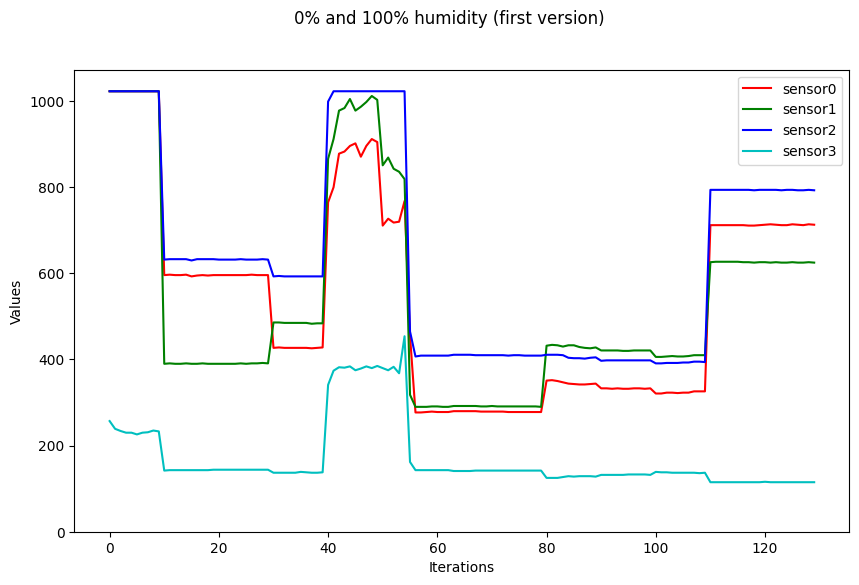

In [65]:
plot_params = dict(     
    calibr_axe_x_max = len(df_0_100_old) + 10,
    calibr_axe_x_min = 0,
    calibr_axe_y_max = params['sensor_max_value'] + 50,
    calibr_axe_y_min = 0,    
    font = 9    
)

fig, ax = plt.subplots()   
ax.plot(df_0_100_old['sens0'], label='sensor0', color='r')
ax.plot(df_0_100_old['sens1'], label='sensor1', color='g')
ax.plot(df_0_100_old['sens2'], label='sensor2', color='b')    
ax.plot(df_0_100_old['sens3'], label='sensor3', color='c')  
ax.legend()
ax.set_xlabel('Iterations')
ax.set_ylabel('Values')
fig.suptitle('0% and 100% humidity (first version)')
fig.set_size_inches(10, 6)

ax.set_ylim(bottom = plot_params['calibr_axe_y_min'])
ax.set_ylim(top = plot_params['calibr_axe_y_max'])


plt.show()

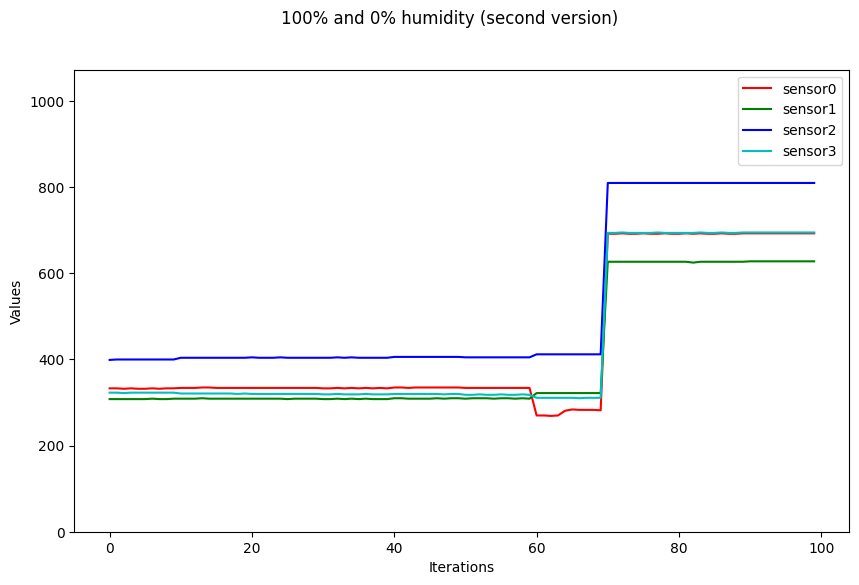

In [66]:
plot_params = dict(     
    calibr_axe_x_max = len(df_0_100_new) + 10,
    calibr_axe_x_min = 0,
    calibr_axe_y_max = params['sensor_max_value'] + 50,
    calibr_axe_y_min = 0,    
    font = 9    
)

fig, ax = plt.subplots()   
ax.plot(df_0_100_new['sens0'], label='sensor0', color='r')
ax.plot(df_0_100_new['sens1'], label='sensor1', color='g')
ax.plot(df_0_100_new['sens2'], label='sensor2', color='b')    
ax.plot(df_0_100_new['sens3'], label='sensor3', color='c')  
ax.legend()
ax.set_xlabel('Iterations')
ax.set_ylabel('Values')
fig.suptitle('100% and 0% humidity (second version)')
fig.set_size_inches(10, 6)

ax.set_ylim(bottom = plot_params['calibr_axe_y_min'])
ax.set_ylim(top = plot_params['calibr_axe_y_max'])


plt.show()

## Calibration : real conditions, 0%, 10%, 30%, 50%, 70% and 100% humidity

In [11]:
# Row data from sensors in 0%, 10%, 30%, 50%, 70% and 100% soil moisture

df_calibr_persent = pd.read_csv(params['calibr_persent_path'], sep=',', names = columns)

df_calibr_persent = df_calibr_persent.astype(int)
df_calibr_persent = (df_calibr_persent.assign(data_type='calibration')
                                .astype({'data_type':'category'})
                                .reset_index(drop=True)
            )

In [67]:
# statistics
summary = df_calibr_persent.describe()
# Apply some styling
styled_summary = (summary
                        .style.set_table_styles([{'selector': 'th', 'props': [('background', '#7ca6db'), ('color', 'white')]}])
                        .format("{:.0f}")
                        .set_caption("Summary Statistics")
                       # .apply(lambda x: ['background: lightgreen' if (x.index == 'max') else '' for i in x], axis=1)
                       )

# Display
display(styled_summary)

,sens0,sens1,sens2,sens3
count,66,66,66,66
mean,448,424,583,161
std,161,140,159,18
min,317,297,377,118
25%,328,313,418,163
50%,368,326,578,164
75%,684,626,753,174
max,694,631,796,177


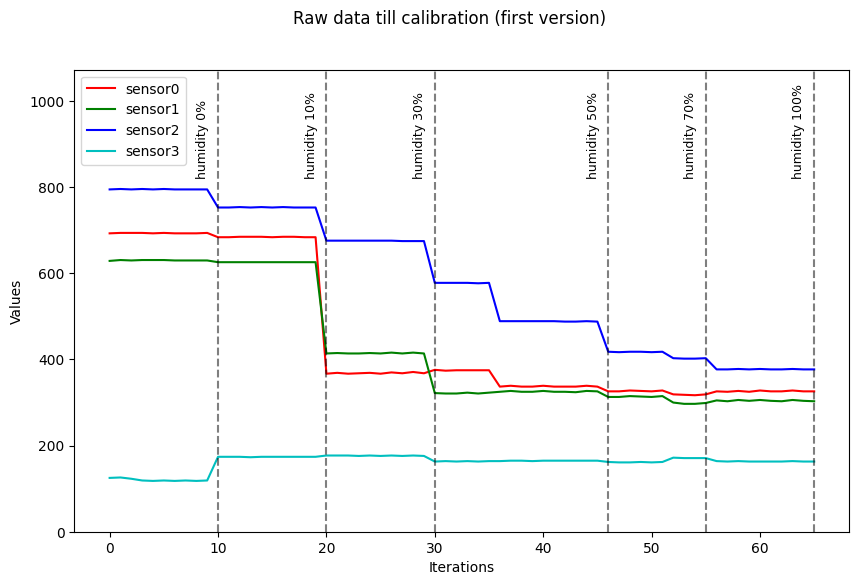

In [68]:
plot_params = dict(      
    calibr_axe_x_max = len(df_calibr_persent) + 10,
    calibr_axe_x_min = 0,
    calibr_axe_y_max = params['sensor_max_value'] + 50,
    calibr_axe_y_min = 0,    
    font = 9    
)

fig, ax = plt.subplots()   
ax.plot(df_calibr_persent['sens0'], label='sensor0', color='r')
ax.plot(df_calibr_persent['sens1'], label='sensor1', color='g')
ax.plot(df_calibr_persent['sens2'], label='sensor2', color='b')    
ax.plot(df_calibr_persent['sens3'], label='sensor3', color='c')  
ax.legend()
ax.set_xlabel('Iterations')
ax.set_ylabel('Values')
fig.suptitle('Raw data till calibration (first version)')
fig.set_size_inches(10, 6)

ax.set_ylim(bottom = plot_params['calibr_axe_y_min'])
ax.set_ylim(top = plot_params['calibr_axe_y_max'])


# Annotations for events
plt.axvline(x=10, color='black', linestyle='--', alpha=0.5)
plt.annotate('humidity 0%'
             , xy=(8, 820)
             , xytext=(8,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )
plt.axvline(x=20, color='black', linestyle='--', alpha=0.5)
plt.annotate('humidity 10%'
             , xy=(18, 820)
             , xytext=(18,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )
plt.axvline(x=30, color='black', linestyle='--', alpha=0.5)
plt.annotate('humidity 30%'
             , xy=(28, 820)
             , xytext=(28,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )
plt.axvline(x=46, color='black', linestyle='--', alpha=0.5)
plt.annotate('humidity 50%'
             , xy=(44, 820)
             , xytext=(44,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )
plt.axvline(x=55, color='black', linestyle='--', alpha=0.5)
plt.annotate('humidity 70%'
             , xy=(53, 820)
             , xytext=(53,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )
plt.axvline(x=65, color='black', linestyle='--', alpha=0.5)
plt.annotate('humidity 100%'
             , xy=(63, 820)
             , xytext=(63,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )

plt.show()

In [69]:
# Row data from sensors in 0%, 10%, 30%, 50%, 70% and 100% soil moisture

df_calibr_persent_new = pd.read_csv(params['calibr_persent_path2'], sep=',', names = columns)
df_calibr_persent_new = df_calibr_persent_new[~df_calibr_persent_new.isnull().any(axis=1)]
df_calibr_persent_new = df_calibr_persent_new.astype(int)
df_calibr_persent_new = (df_calibr_persent_new.assign(data_type='calibration')
                                .astype({'data_type':'category'})
                                .reset_index(drop=True)
            )

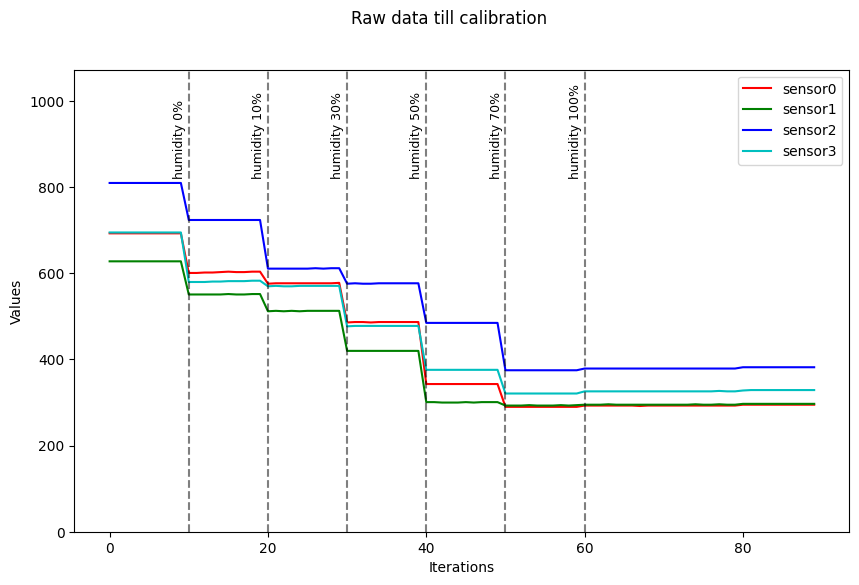

In [95]:
plot_params = dict(      
    calibr_axe_x_max = len(df_calibr_persent_new) + 10,
    calibr_axe_x_min = 0,
    calibr_axe_y_max = params['sensor_max_value'] + 50,
    calibr_axe_y_min = 0,    
    font = 9    
)

fig, ax = plt.subplots()   
ax.plot(df_calibr_persent_new['sens0'], label='sensor0', color='r')
ax.plot(df_calibr_persent_new['sens1'], label='sensor1', color='g')
ax.plot(df_calibr_persent_new['sens2'], label='sensor2', color='b')    
ax.plot(df_calibr_persent_new['sens3'], label='sensor3', color='c')  
ax.legend()
ax.set_xlabel('Iterations')
ax.set_ylabel('Values')
fig.suptitle('Raw data till calibration')
fig.set_size_inches(10, 6)

ax.set_ylim(bottom = plot_params['calibr_axe_y_min'])
ax.set_ylim(top = plot_params['calibr_axe_y_max'])


# Annotations for events
plt.axvline(x=10, color='black', linestyle='--', alpha=0.5)
plt.annotate('humidity 0%'
             , xy=(8, 820)
             , xytext=(8,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )
plt.axvline(x=20, color='black', linestyle='--', alpha=0.5)
plt.annotate('humidity 10%'
             , xy=(18, 820)
             , xytext=(18,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )
plt.axvline(x=30, color='black', linestyle='--', alpha=0.5)
plt.annotate('humidity 30%'
             , xy=(28, 820)
             , xytext=(28,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )
plt.axvline(x=40, color='black', linestyle='--', alpha=0.5)
plt.annotate('humidity 50%'
             , xy=(38, 820)
             , xytext=(38,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )
plt.axvline(x=50, color='black', linestyle='--', alpha=0.5)
plt.annotate('humidity 70%'
             , xy=(48, 820)
             , xytext=(48,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )
plt.axvline(x=60, color='black', linestyle='--', alpha=0.5)
plt.annotate('humidity 100%'
             , xy=(58, 820)
             , xytext=(58,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )

plt.show()

In [97]:
# statistics
summary2 = df_calibr_persent2.describe()
# Apply some styling
styled_summary2 = (summary2
                        .style.set_table_styles([{'selector': 'th', 'props': [('background', '#7ca6db'), ('color', 'white')]}])
                        .format("{:.0f}")
                        .set_caption("Summary Statistics")
                       # .apply(lambda x: ['background: lightgreen' if (x.index == 'max') else '' for i in x], axis=1)
                       )

# Display
max_min2 = summary2.loc[['max', 'min']]
print(100*max_min2.loc['min']/max_min2.loc['max'])


display(styled_summary2)


sens0    41.847042
sens1    46.656051
sens2    46.296296
sens3    46.187050
dtype: float64


,sens0,sens1,sens2,sens3
count,90,90,90,90
mean,430,399,525,445
std,152,126,157,134
min,290,293,375,321
25%,293,295,379,326
50%,343,301,485,376
75%,577,513,612,571
max,693,628,810,695


## Calibration : comparition of ideal and real

### First version

In [72]:
real_0_percents = df_calibr_persent.max(numeric_only = True).tolist()
print("Maximal real values: ", real_0_percents)

ideal_0_percents = df_0_100_old.quantile(.75, numeric_only = True).astype(int).tolist()
print("Maximal ideal values:", ideal_0_percents)

real_100_percents = df_calibr_persent.min(numeric_only = True).tolist()
print("Minimal real values: ", real_100_percents)

ideal_100_percents = df_0_100_old.min(numeric_only = True).tolist()
print("Minimal ideal values:", ideal_100_percents)

Maximal real values:  [694, 631, 796, 177]
Maximal ideal values: [712, 626, 794, 144]
Minimal real values:  [317, 297, 377, 118]
Minimal ideal values: [277, 290, 391, 115]


In [73]:
calculated_10_percentage = list()
calculated_30_percentage = list()
calculated_50_percentage = list()
calculated_70_percentage = list()
for i in range(len(ideal_100_percents)):
    elMax = ideal_100_percents[i]
    elMin = ideal_0_percents[i]
    calculated_10_percentage.append(int(elMin + (elMax - elMin)*0.1))
    calculated_30_percentage.append(int(elMin + (elMax - elMin)*0.3))
    calculated_50_percentage.append(int(elMin + (elMax - elMin)*0.5))
    calculated_70_percentage.append(int(elMin + (elMax - elMin)*0.7))

perc_0 = df_calibr_persent.iloc[0:10].mean(numeric_only = True).astype(int).tolist()
perc_10 = df_calibr_persent.iloc[11:20].mean(numeric_only = True).astype(int).tolist()
perc_30 = df_calibr_persent.iloc[21:30].mean(numeric_only = True).astype(int).tolist()
perc_50 = df_calibr_persent.iloc[31:40].mean(numeric_only = True).astype(int).tolist()
perc_70 = df_calibr_persent.iloc[41:50].mean(numeric_only = True).astype(int).tolist()
perc_100 = df_calibr_persent.iloc[51:60].mean(numeric_only = True).astype(int).tolist()    
    
print("Observed ideal   0% of humidity:       ", ideal_0_percents)
print("Observed         0% of humidity, mean: ", perc_0, "\n")

print("Calculated      10% of humidity:       ", calculated_10_percentage)
print("Observed        10% of humidity, mean: ", perc_10, "\n")
    
print("Calculated      30% of humidity:       ", calculated_30_percentage)
print("Observed        30% of humidity, mean: ", perc_30, "\n")
    
print("Calculated      50% of humidity:       ", calculated_50_percentage)
print("Observed        50% of humidity, mean: ", perc_50, "\n")
    
print("Calculated      70% of humidity:       ", calculated_70_percentage)
print("Observed        70% of humidity, mean: ", perc_70, "\n")

print("Observed ideal 100% of humidity:       ", ideal_100_percents)
print("Observed       100% of humidity, mean: ", perc_100, "\n")

Observed ideal   0% of humidity:        [712, 626, 794, 144]
Observed         0% of humidity, mean:  [693, 630, 795, 120] 

Calculated      10% of humidity:        [668, 592, 753, 141]
Observed        10% of humidity, mean:  [684, 626, 753, 173] 

Calculated      30% of humidity:        [581, 525, 673, 135]
Observed        30% of humidity, mean:  [368, 414, 675, 176] 

Calculated      50% of humidity:        [494, 458, 592, 129]
Observed        50% of humidity, mean:  [358, 323, 538, 164] 

Calculated      70% of humidity:        [407, 390, 511, 123]
Observed        70% of humidity, mean:  [332, 320, 457, 163] 

Observed ideal 100% of humidity:        [277, 290, 391, 115]
Observed       100% of humidity, mean:  [322, 302, 393, 166] 



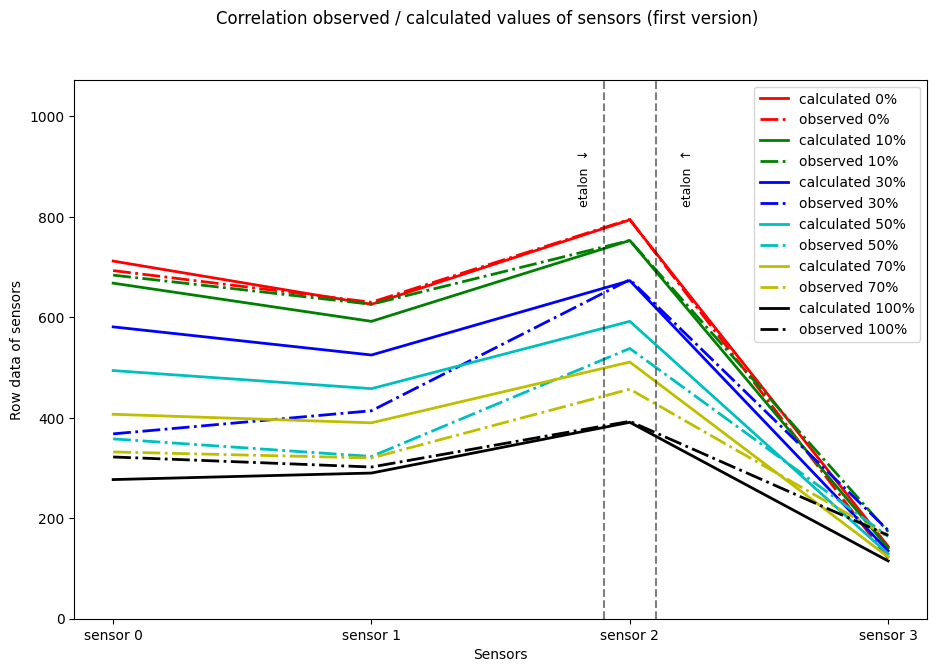

In [74]:
plot_params = dict(      
    calibr_axe_x_max = len(df_0_100_old) + 10,
    calibr_axe_x_min = 0,
    calibr_axe_y_max = params['sensor_max_value'] + 50,
    calibr_axe_y_min = 0,
    line_style_1 = '-',
    line_style_2 = 'dashdot',
    font = 9    
)


fig, ax = plt.subplots()

ax.plot(ideal_0_percents, label='calculated 0%', color='r', linestyle = plot_params['line_style_1'], linewidth = 2)
ax.plot(perc_0, label='observed 0%', color='r', linestyle = plot_params['line_style_2'], linewidth = 2)

ax.plot(calculated_10_percentage, label='calculated 10%', color='g', linestyle = plot_params['line_style_1'], linewidth = 2)
ax.plot(perc_10, label='observed 10%', color='g', linestyle = plot_params['line_style_2'], linewidth = 2)

ax.plot(calculated_30_percentage, label='calculated 30%', color='b', linestyle = plot_params['line_style_1'], linewidth = 2) 
ax.plot(perc_30, label='observed 30%', color='b', linestyle = plot_params['line_style_2'], linewidth = 2)    

ax.plot(calculated_50_percentage, label='calculated 50%', color='c', linestyle = plot_params['line_style_1'], linewidth = 2)
ax.plot(perc_50, label='observed 50%', color='c', linestyle = plot_params['line_style_2'], linewidth = 2)

ax.plot(calculated_70_percentage, label='calculated 70%', color='y', linestyle = plot_params['line_style_1'], linewidth = 2) 
ax.plot(perc_70, label='observed 70%', color='y', linestyle = plot_params['line_style_2'], linewidth = 2)  

ax.plot(ideal_100_percents, label='calculated 100%', color="k", linestyle = plot_params['line_style_1'], linewidth = 2)
ax.plot(perc_100, label='observed 100%', color="k", linestyle = plot_params['line_style_2'], linewidth = 2)

ax.legend()
ax.set_xlabel('Sensors')
ax.set_ylabel('Row data of sensors')
fig.suptitle('Сorrelation observed / calculated values of sensors (first version)')
fig.set_size_inches(11, 7)

ax.set_ylim(bottom = plot_params['calibr_axe_y_min'])
ax.set_ylim(top = plot_params['calibr_axe_y_max'])

ax.xaxis.set_ticks(np.arange(0, 4, 1.0), ['sensor 0', 'sensor 1', 'sensor 2', 'sensor 3'])

plt.axvline(x=1.9, color='black', linestyle='--', alpha=0.5)
plt.annotate('etalon  ↓'
             , xy=(1.8, 820)
             , xytext=(1.8, 820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )

plt.axvline(x=2.1, color='black', linestyle='--', alpha=0.5)
plt.annotate('etalon  ↑'
             , xy=(2.2, 820)
             , xytext=(2.2,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )

plt.show()

### Second version

In [75]:
real_0_percents = df_calibr_persent2.max(numeric_only = True).tolist()
print("Maximal real values: ", real_0_percents)

ideal_0_percents = df_0_100_new.quantile(.75, numeric_only = True).astype(int).tolist()
print("Maximal ideal values:", ideal_0_percents)

real_100_percents = df_calibr_persent2.min(numeric_only = True).tolist()
print("Minimal real values: ", real_100_percents)

ideal_100_percents = df_0_100_new.min(numeric_only = True).tolist()
print("Minimal ideal values:", ideal_100_percents)

Maximal real values:  [693, 628, 810, 695]
Maximal ideal values: [692, 627, 810, 694]
Minimal real values:  [290, 293, 375, 321]
Minimal ideal values: [269, 308, 399, 310]


In [76]:
calculated_10_percentage = list()
calculated_30_percentage = list()
calculated_50_percentage = list()
calculated_70_percentage = list()
for i in range(len(ideal_100_percents)):
    elMax = ideal_100_percents[i]
    elMin = ideal_0_percents[i]
    calculated_10_percentage.append(int(elMin + (elMax - elMin)*0.1))
    calculated_30_percentage.append(int(elMin + (elMax - elMin)*0.3))
    calculated_50_percentage.append(int(elMin + (elMax - elMin)*0.5))
    calculated_70_percentage.append(int(elMin + (elMax - elMin)*0.7))

perc_0 = df_calibr_persent2.iloc[0:10].mean(numeric_only = True).astype(int).tolist()
perc_10 = df_calibr_persent2.iloc[11:20].mean(numeric_only = True).astype(int).tolist()
perc_30 = df_calibr_persent2.iloc[21:30].mean(numeric_only = True).astype(int).tolist()
perc_50 = df_calibr_persent2.iloc[31:40].mean(numeric_only = True).astype(int).tolist()
perc_70 = df_calibr_persent2.iloc[41:50].mean(numeric_only = True).astype(int).tolist()
perc_100 = df_calibr_persent2.iloc[51:60].mean(numeric_only = True).astype(int).tolist()    
    
print("Observed ideal   0% of humidity:       ", ideal_0_percents)
print("Observed         0% of humidity, mean: ", perc_0, "\n")

print("Calculated      10% of humidity:       ", calculated_10_percentage)
print("Observed        10% of humidity, mean: ", perc_10, "\n")
    
print("Calculated      30% of humidity:       ", calculated_30_percentage)
print("Observed        30% of humidity, mean: ", perc_30, "\n")
    
print("Calculated      50% of humidity:       ", calculated_50_percentage)
print("Observed        50% of humidity, mean: ", perc_50, "\n")
    
print("Calculated      70% of humidity:       ", calculated_70_percentage)
print("Observed        70% of humidity, mean: ", perc_70, "\n")

print("Observed ideal 100% of humidity:       ", ideal_100_percents)
print("Observed       100% of humidity, mean: ", perc_100, "\n")

Observed ideal   0% of humidity:        [692, 627, 810, 694]
Observed         0% of humidity, mean:  [693, 628, 810, 695] 

Calculated      10% of humidity:        [649, 595, 768, 655]
Observed        10% of humidity, mean:  [602, 551, 724, 581] 

Calculated      30% of humidity:        [565, 531, 686, 578]
Observed        30% of humidity, mean:  [577, 512, 611, 570] 

Calculated      50% of humidity:        [480, 467, 604, 502]
Observed        50% of humidity, mean:  [486, 420, 576, 478] 

Calculated      70% of humidity:        [395, 403, 522, 425]
Observed        70% of humidity, mean:  [343, 300, 485, 376] 

Observed ideal 100% of humidity:        [269, 308, 399, 310]
Observed       100% of humidity, mean:  [290, 293, 375, 321] 



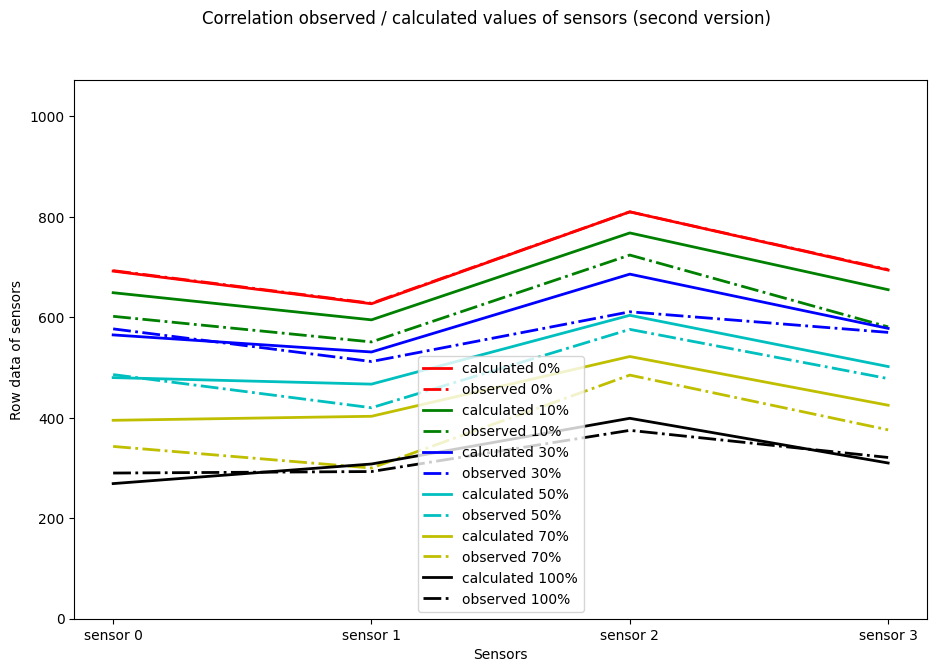

In [77]:
plot_params = dict(      
    calibr_axe_x_max = len(df_0_100_new) + 10,
    calibr_axe_x_min = 0,
    calibr_axe_y_max = params['sensor_max_value'] + 50,
    calibr_axe_y_min = 0,
    line_style_1 = '-',
    line_style_2 = 'dashdot',
    font = 9    
)


fig, ax = plt.subplots()

ax.plot(ideal_0_percents, label='calculated 0%', color='r', linestyle = plot_params['line_style_1'], linewidth = 2)
ax.plot(perc_0, label='observed 0%', color='r', linestyle = plot_params['line_style_2'], linewidth = 2)

ax.plot(calculated_10_percentage, label='calculated 10%', color='g', linestyle = plot_params['line_style_1'], linewidth = 2)
ax.plot(perc_10, label='observed 10%', color='g', linestyle = plot_params['line_style_2'], linewidth = 2)

ax.plot(calculated_30_percentage, label='calculated 30%', color='b', linestyle = plot_params['line_style_1'], linewidth = 2) 
ax.plot(perc_30, label='observed 30%', color='b', linestyle = plot_params['line_style_2'], linewidth = 2)    

ax.plot(calculated_50_percentage, label='calculated 50%', color='c', linestyle = plot_params['line_style_1'], linewidth = 2)
ax.plot(perc_50, label='observed 50%', color='c', linestyle = plot_params['line_style_2'], linewidth = 2)

ax.plot(calculated_70_percentage, label='calculated 70%', color='y', linestyle = plot_params['line_style_1'], linewidth = 2) 
ax.plot(perc_70, label='observed 70%', color='y', linestyle = plot_params['line_style_2'], linewidth = 2)  

ax.plot(ideal_100_percents, label='calculated 100%', color="k", linestyle = plot_params['line_style_1'], linewidth = 2)
ax.plot(perc_100, label='observed 100%', color="k", linestyle = plot_params['line_style_2'], linewidth = 2)

ax.legend()
ax.set_xlabel('Sensors')
ax.set_ylabel('Row data of sensors')
fig.suptitle('Сorrelation observed / calculated values of sensors (second version)')
fig.set_size_inches(11, 7)

ax.set_ylim(bottom = plot_params['calibr_axe_y_min'])
ax.set_ylim(top = plot_params['calibr_axe_y_max'])

ax.xaxis.set_ticks(np.arange(0, 4, 1.0), ['sensor 0', 'sensor 1', 'sensor 2', 'sensor 3'])



plt.show()

In [78]:
# dry air with sensor's perturbations

df_dry_perturb = pd.read_csv(params['drypath'], sep=',', names = columns)

df_dry_perturb = df_dry_perturb[~df_dry_perturb['sens0'].str.contains('-')]
df_dry_perturb = df_dry_perturb.astype(int)
df_dry_perturb = (df_dry_perturb.assign(data_type='dry air perturbations')
                                .astype({'data_type':'category'})
                                .reset_index(drop=True)
                 )
#df_dry_perturb


In [79]:
# dry air without any sensor's perturbations

df_dry_air = pd.read_csv(params['drypath_air'], sep=',', names = columns)

df_dry_air = df_dry_air[~df_dry_air['sens0'].str.contains('-')]
df_dry_air = df_dry_air.astype(int)
df_dry_air = (df_dry_air.assign(data_type='dry air')
                                .astype({'data_type':'category'})
                                .reset_index(drop=True)
                 )
#df_dry_air

In [80]:
# dry soil without any sensor's perturbations
df_dry_soil = pd.read_csv(params['drypath_soil'], sep=',', names = columns)

df_dry_soil = df_dry_soil[~df_dry_soil['sens0'].str.contains('-')]
df_dry_soil = df_dry_soil.astype(int)
df_dry_soil = (df_dry_soil.assign(data_type='dry soil')
                                .astype({'data_type':'category'})
                                .reset_index(drop=True)
                 )

In [81]:
# sensors in water

df_moist_water = pd.read_csv(params['moistpath_water'], sep=',', names = columns)

df_moist_water = df_moist_water[~df_moist_water['sens0'].str.contains('-')]
df_moist_water = df_moist_water.astype(int)
df_moist_water = (df_moist_water.assign(data_type='moist water')
                                .astype({'data_type':'category'})
                                .reset_index(drop=True)
                 )

In [82]:
# dry air + soil
df_dry = pd.concat([df_dry_perturb, df_dry_air, df_dry_soil]).reset_index(drop=True)

In [83]:
# all

df = pd.concat([df_dry, df_moist_water])

## Dry statistics 



In [84]:
# Dry statistics
print('Dry air + soil statistics')
summary_stats = df_dry.describe()

# Apply some styling
styled_summary_stats = (summary_stats
                        .style.set_table_styles([{'selector': 'th', 'props': [('background', '#7ca6db'), ('color', 'white')]}])
                        .format("{:.0f}")
                        .set_caption("Summary Statistics")
                        .highlight_max(subset=None, color='lightgreen', axis=0, props=None)
                       # .apply(lambda x: ['background: lightgreen' if (x.index == 'max') else '' for i in x], axis=1)
                       )

# Display
display(styled_summary_stats)

Dry air + soil statistics


,sens0,sens1,sens2,sens3
count,340,340,340,340
mean,728,667,822,195
std,124,149,87,167
min,649,486,743,103
25%,669,591,785,118
50%,682,624,798,125
75%,693,630,812,126
max,1023,1023,1023,695


## Moist statistics 



In [85]:
# Moist statistics
summary_stats = df_moist_water.describe()

# Apply some styling
styled_summary_stats = (summary_stats
                        .style.set_table_styles([{'selector': 'th', 'props': [('background', '#7ca6db'), ('color', 'white')]}])
                        .format("{:.0f}")
                        .set_caption("Summary Statistics")
                       # .highlight_max(subset=None, color='lightgreen', axis=0, props=None)       
                        )

# Display
display(styled_summary_stats)

,sens0,sens1,sens2,sens3
count,40,40,40,40
mean,250,260,330,56
std,4,4,6,6
min,245,255,321,50
25%,247,257,325,51
50%,250,260,331,55
75%,254,264,335,61
max,254,264,335,65


## Standartisation (old)


In [89]:
# WARNING : TODO made for 'dry_air' without perturbations, but need for 'dry_soil'

# row values for sensors 0-3, starting from which the soil is considered well dried
# i.e.   if value is from    [dry_0_percents, 1023] =>  soil is 0% watered

dry_0_percents = df_dry_air.min(numeric_only = True).tolist()
dry_0_percents

[669, 573, 783, 121]

In [90]:
# WARNING : made for 'moist_water' without perturbations, but need for 'moist_soil'

# row values for sensors 0-3, starting from which the soil is considered well watered  
# i.e.   if value is from    [0, moist_100_percent] =>  soil is 100% watered

moist_100_percent = df_moist_water.max(numeric_only = True).tolist()
moist_100_percent

[254, 264, 335, 65]

In [91]:
standarts = dict(
    sens0_zero_watered = dry_0_percents[0],
    sens0_full_watered = moist_100_percent[0],
    sens1_zero_watered = dry_0_percents[1],
    sens1_full_watered = moist_100_percent[1],
    sens2_zero_watered = dry_0_percents[2],
    sens2_full_watered = moist_100_percent[2],
    sens3_zero_watered = dry_0_percents[3],
    sens3_full_watered = moist_100_percent[3]
)

standarts

{'sens0_zero_watered': 669,
 'sens0_full_watered': 254,
 'sens1_zero_watered': 573,
 'sens1_full_watered': 264,
 'sens2_zero_watered': 783,
 'sens2_full_watered': 335,
 'sens3_zero_watered': 121,
 'sens3_full_watered': 65}

## Visualization 

In [92]:
plot_params = dict(
    dry_axe_x_max = len(df_dry) + 10,
    dry_axe_x_min = 0,
    dry_axe_y_max = params['sensor_max_value'] + 50,
    dry_axe_y_min = 0,
    moist_axe_x_max = len(df_moist_water) + 10,
    moist_axe_x_min = 0,
    moist_axe_y_max = params['sensor_max_value'] + 50,
    moist_axe_y_min = 0,
    font = 9    
)

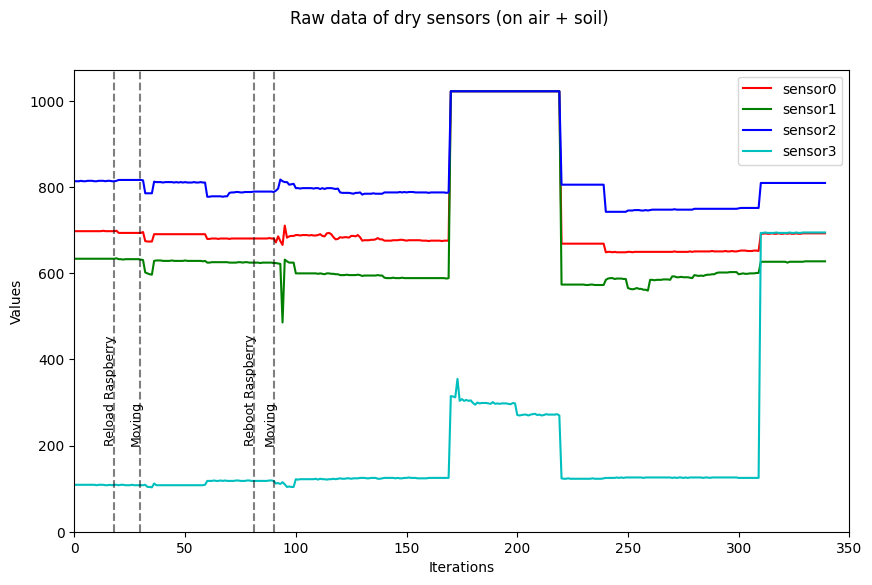

In [93]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
#fig, axs = plt.subplots(nrows= 2 , ncols= 1 )


plt.axis([plot_params['dry_axe_x_min']
          , plot_params['dry_axe_x_max']
          , plot_params['dry_axe_y_min']
          , plot_params['dry_axe_y_max']])

ax.plot(df_dry['sens0'], label='sensor0', color='r')
ax.plot(df_dry['sens1'], label='sensor1', color='g')
ax.plot(df_dry['sens2'], label='sensor2', color='b')    
ax.plot(df_dry['sens3'], label='sensor3', color='c')  
ax.legend()
ax.set_xlabel('Iterations')
ax.set_ylabel('Values')
fig.suptitle('Raw data of dry sensors (on air + soil)')
fig.set_size_inches(10, 6)


#axs[0].plot(df_dry.index, df_dry[['sens0', 'sens1', 'sens2', 'sens3']].values)
#axs[0].set_title('Dry')
#

ax.set_ylim(bottom=plot_params['dry_axe_y_min'])
ax.set_ylim(top=plot_params['dry_axe_y_max'])

# Annotations for events
coeff = (1 - 1/10) #each 11th line contained timestamp was deleted, so need to correct

plt.axvline(x = 20*coeff, color='black', linestyle='--', alpha=0.5)
plt.annotate('Reload Raspberry'
             , xy=(15*coeff, 200)
             , xytext=(15*coeff,200)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )
plt.axvline(x=33*coeff, color='black', linestyle='--', alpha=0.5)
plt.annotate('Moving'
             , xy=(28*coeff, 200)
             , xytext=(28*coeff,200)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )

plt.axvline(x=90*coeff, color='black', linestyle='--', alpha=0.5)
plt.annotate('Reboot Raspberry'
             , xy=(83*coeff, 200)
             , xytext=(85*coeff,200)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )

plt.axvline(x=100*coeff, color='black', linestyle='--', alpha=0.5)
plt.annotate('Moving'
             , xy=(95*coeff, 200)
             , xytext=(95*coeff,200)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )
plt.show()

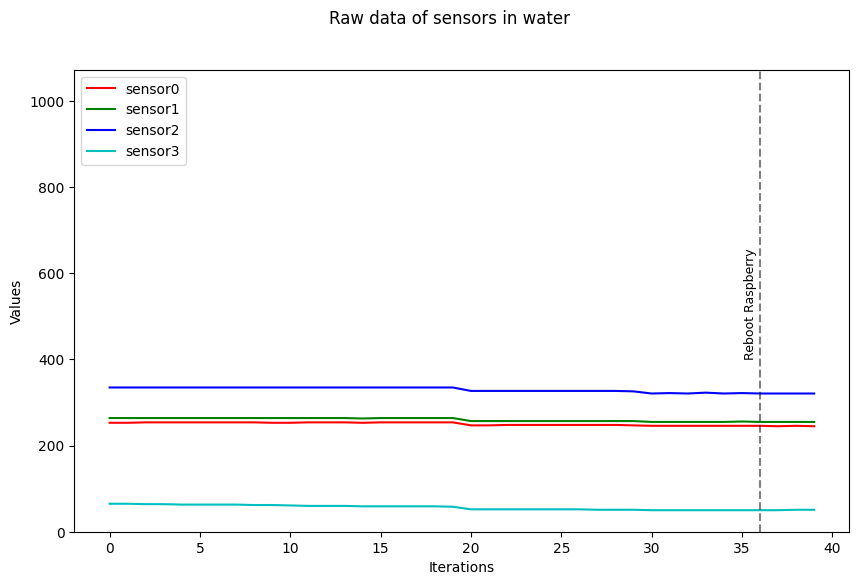

In [94]:
# Raw data of sensors in water

fig, ax = plt.subplots()   
ax.plot(df_moist_water['sens0'], label='sensor0', color='r')
ax.plot(df_moist_water['sens1'], label='sensor1', color='g')
ax.plot(df_moist_water['sens2'], label='sensor2', color='b')    
ax.plot(df_moist_water['sens3'], label='sensor3', color='c')  
ax.legend()
ax.set_xlabel('Iterations')
ax.set_ylabel('Values')
fig.suptitle('Raw data of sensors in water')
fig.set_size_inches(10, 6)

ax.set_ylim(bottom = plot_params['moist_axe_y_min'])
ax.set_ylim(top = plot_params['moist_axe_y_max'])


# Annotations for events
plt.axvline(x=40*coeff, color='black', linestyle='--', alpha=0.5)
plt.annotate('Reboot Raspberry'
             , xy=(39*coeff, 400)
             , xytext=(39*coeff,400)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )

plt.show()